<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [2]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [4]:
# Import 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [24]:
# Normalize the data and split into train/test sets
sc = StandardScaler()
xt = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.2, random_state=11, stratify=y)


In [25]:
#Loop through k

tp, tn, fp, fn =[], [], [], []
accuracy = []
err = []
knn = range(1, 40)

for k in knn:
      #Create kNN classifer object that votes
      model = KNeighborsClassifier(n_neighbors=k)
      # fit kNN classifer - "fit" here means to memorize the data since kNN is a lazy learner
      model = model.fit(x_train,y_train)

      #print results
      acc = metrics.accuracy_score(y_test,  model.predict(x_test))
      accuracy.append(acc)
      err.append(1-acc)
      cm = confusion_matrix(y_test,  model.predict(x_test))
      print(list(cm/cm.sum()))





[array([0.50649351, 0.14285714]), array([0.18181818, 0.16883117])]
[array([0.56493506, 0.08441558]), array([0.24675325, 0.1038961 ])]
[array([0.52597403, 0.12337662]), array([0.15584416, 0.19480519])]
[array([0.57792208, 0.07142857]), array([0.22727273, 0.12337662])]
[array([0.53246753, 0.11688312]), array([0.14935065, 0.2012987 ])]
[array([0.57142857, 0.07792208]), array([0.2012987 , 0.14935065])]
[array([0.53896104, 0.11038961]), array([0.16233766, 0.18831169])]
[array([0.56493506, 0.08441558]), array([0.18831169, 0.16233766])]
[array([0.55844156, 0.09090909]), array([0.15584416, 0.19480519])]
[array([0.58441558, 0.06493506]), array([0.18831169, 0.16233766])]
[array([0.57142857, 0.07792208]), array([0.16233766, 0.18831169])]
[array([0.57792208, 0.07142857]), array([0.2012987 , 0.14935065])]
[array([0.57142857, 0.07792208]), array([0.16233766, 0.18831169])]
[array([0.59090909, 0.05844156]), array([0.17532468, 0.17532468])]
[array([0.57792208, 0.07142857]), array([0.16883117, 0.1818181

In [26]:
tp, tn, fp, fn =[], [], [], []
dw_accuracy = []
dw_err = []
knn = range(1, 40)

for k in knn:
      #Create kNN classifer object that votes
      model = KNeighborsClassifier(n_neighbors=k, weights='distance')
      # fit kNN classifer - "fit" here means to memorize the data since kNN is a lazy learner
      model = model.fit(x_train,y_train)

      #print results
      acc = metrics.accuracy_score(y_test,  model.predict(x_test))
      dw_accuracy.append(acc)
      dw_err.append(1-acc)
      cm = confusion_matrix(y_test,  model.predict(x_test))
      print(list(cm/cm.sum()))




[array([0.50649351, 0.14285714]), array([0.18181818, 0.16883117])]
[array([0.50649351, 0.14285714]), array([0.18181818, 0.16883117])]
[array([0.52597403, 0.12337662]), array([0.15584416, 0.19480519])]
[array([0.53246753, 0.11688312]), array([0.15584416, 0.19480519])]
[array([0.52597403, 0.12337662]), array([0.15584416, 0.19480519])]
[array([0.53246753, 0.11688312]), array([0.14935065, 0.2012987 ])]
[array([0.53896104, 0.11038961]), array([0.16233766, 0.18831169])]
[array([0.53896104, 0.11038961]), array([0.15584416, 0.19480519])]
[array([0.55194805, 0.0974026 ]), array([0.15584416, 0.19480519])]
[array([0.55194805, 0.0974026 ]), array([0.15584416, 0.19480519])]
[array([0.56493506, 0.08441558]), array([0.16233766, 0.18831169])]
[array([0.56493506, 0.08441558]), array([0.15584416, 0.19480519])]
[array([0.57142857, 0.07792208]), array([0.16233766, 0.18831169])]
[array([0.57142857, 0.07792208]), array([0.16233766, 0.18831169])]
[array([0.57792208, 0.07142857]), array([0.16883117, 0.1818181

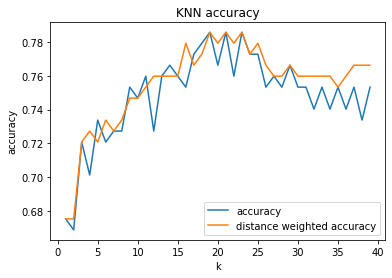

In [27]:
pyplot.plot(knn, accuracy, label='accuracy')
pyplot.plot(knn, dw_accuracy, label = 'distance weighted accuracy')
pyplot.title('KNN accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('k')
pyplot.legend(loc='best')
pyplot.show()

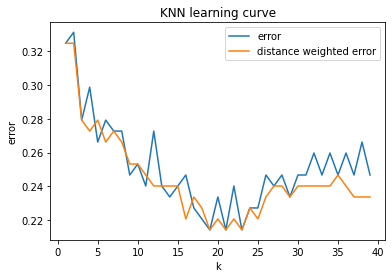

In [28]:
pyplot.plot(knn, err, label='error')
pyplot.plot(knn, dw_err, label = 'distance weighted error')
pyplot.title('KNN learning curve')
pyplot.ylabel('error')
pyplot.xlabel('k')
pyplot.legend(loc='best')
pyplot.show()